<a href="https://colab.research.google.com/github/darshan-k3/Low-Complexity-Deepfake-Detection-Model/blob/main/SVM_Multimodal_Model_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
base_dir_real_real = '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio'
video_files = []
categories = set()
for root, dirs, files in os.walk(base_dir_real_real):
  for file in files:
    print(f'File: {file}')
    category = root.split("/")[-3]
    if category not in categories:
      categories.add(category)

print(categories)
# /content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id03205

In [ ]:
length = 0
files = set()
for root, dirs, files in os.walk('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/FakeVideo-RealAudio'):
  for file in files:
    if file.endswith('.mp4'):
      if file not in files:
        length += 1
# 10857 fake-fake
# 500 real-real
# 500 real-fake
# 9738
length

9738

In [ ]:
import os
import random
from collections import defaultdict

# Define base directories
base_dirs = {
    '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio': (0, 0),
    '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-FakeAudio': (0, 1),
    '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/FakeVideo-RealAudio': (1, 0),
    '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/FakeVideo-FakeAudio': (1, 1)
}

ethnicities = ['Caucasian (European)', 'Asian (East)', 'Asian (South)', 'African', 'Caucasian (American)']
sexes = ['men', 'women']

# /content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id03205
def collect_representative_files(base_dir):
    video_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.mp4'):
                video_files.append(os.path.join(root, file))
    final_paths = []
    for eth in ethnicities:
        for sex in sexes:
            # Filter and sample in one step
            filtered_paths = [path for path in video_files if eth == path.split('/')[-4] and sex == path.split('/')[-3]]
            # if len(filtered_paths) < 20:
            # print(f"Warning: Only found {len(filtered_paths)} videos for {eth}, {sex} in {base_dir}")
            final_paths.extend(random.sample(filtered_paths, 20))
            print(f'{eth}, {sex} with final paths length {len(final_paths)}')

    print(len(final_paths))
    return final_paths

# Prepare the training data
# for base_dir, label in base_dirs.items():
#     random_files = collect_representative_files(base_dir)
#     training_path_dict.update({file: label for file in random_files})

training_path_dict = defaultdict()
test_list = []
for base_dir, label in base_dirs.items():
    random_files = collect_representative_files(base_dir)
    # Update keys to be tuples of (file_path, label), ensuring uniqueness
    for file in random_files:
        test_list.append(file)
        # This creates a unique key for each file by combining its path and the label
        training_path_dict[(file, label)] = label
# Now, training_path_dict contains the paths and labels


Caucasian (European), men with final paths length 20
Caucasian (European), women with final paths length 40
Asian (East), men with final paths length 60
Asian (East), women with final paths length 80
Asian (South), men with final paths length 100
Asian (South), women with final paths length 120
African, men with final paths length 140
African, women with final paths length 160
Caucasian (American), men with final paths length 180
Caucasian (American), women with final paths length 200
200
Caucasian (European), men with final paths length 20
Caucasian (European), women with final paths length 40
Asian (East), men with final paths length 60
Asian (East), women with final paths length 80
Asian (South), men with final paths length 100
Asian (South), women with final paths length 120
African, men with final paths length 140
African, women with final paths length 160
Caucasian (American), men with final paths length 180
Caucasian (American), women with final paths length 200
200
Caucasian (E

In [ ]:
len(training_path_dict)

800

In [ ]:
# Identify duplicates in the list
def identify_duplicates(input_list):
    seen = set()
    duplicates = set()
    for item in input_list:
        # If the item is already in seen, add to duplicates
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    return list(duplicates)
lst = identify_duplicates(training_path_dict)

lst

[]

In [ ]:
[file for file in test_list if file == '/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (American)/women/id00261/00048.mp4']

[]

In [ ]:
len(test_list)

800

In [ ]:
len(training_path_dict)

800

In [ ]:
training_path_dict

defaultdict(None,
            {('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id00548/00015.mp4',
              (0, 0)): (0, 0),
             ('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id00358/00217.mp4',
              (0, 0)): (0, 0),
             ('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id02567/00040.mp4',
              (0, 0)): (0, 0),
             ('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id01052/00076.mp4',
              (0, 0)): (0, 0),
             ('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)/men/id03205/00150.mp4',
              (0, 0)): (0, 0),
             ('/content/drive/MyDrive/FakeAVCeleb_v1.2_full/FakeAVCeleb_v1.2/RealVideo-RealAudio/Caucasian (European)

In [ ]:
!rm -r benchmark_dataset

In [ ]:
import shutil
import os

real_real_dir = os.path.join('benchmark_dataset', 'RealVideo-RealAudio')
real_fake_dir = os.path.join('benchmark_dataset', 'RealVideo-FakeAudio')
fake_real_dir = os.path.join('benchmark_dataset', 'FakeVideo-RealAudio')
fake_fake_dir = os.path.join('benchmark_dataset', 'FakeVideo-FakeAudio')

os.makedirs(real_real_dir, exist_ok=True)
os.makedirs(real_fake_dir, exist_ok=True)
os.makedirs(fake_real_dir, exist_ok=True)
os.makedirs(fake_fake_dir, exist_ok=True)


for path, label in training_path_dict.items():
  if label == (0, 0): # real video real audio
    shutil.copy(path[0], os.path.join(real_real_dir, "_".join(path[0].split('/')[-3:])))
  if label == (0, 1): # real video fake audio
    shutil.copy(path[0], os.path.join(real_fake_dir, "_".join(path[0].split('/')[-3:])))
  if label == (1, 0): # fake video real audio
    shutil.copy(path[0], os.path.join(fake_real_dir, "_".join(path[0].split('/')[-3:])))
  if label == (1, 1): # fake video fake audio
    shutil.copy(path[0], os.path.join(fake_fake_dir, "_".join(path[0].split('/')[-3:])))


In [ ]:
for path, label in training_path_dict.items():
  "_".join(path[0].split('/')[-3:])

In [ ]:
len(os.listdir(os.path.join('benchmark_dataset', 'FakeVideo-FakeAudio')))

200

In [ ]:
#@title Zip Benchmark Dataset
# !zip -r benchmark_dataset.zip benchmark_dataset

In [ ]:
#@title Download dataset
import os
# !rm -r benchmark_dataset
if not os.path.isdir('benchmark_dataset'):
  !unzip /content/drive/MyDrive/benchmark_dataset_uncorrupted.zip

# Remove hidden .ipynb checkpoints folder
if os.path.isdir('benchmark_dataset/RealVideo-FakeAudio/.ipynb_checkpoints'):
  !rm -r benchmark_dataset/RealVideo-FakeAudio/.ipynb_checkpoints

if os.path.isdir('temp'):
  !rm -r temp/
os.makedirs('temp', exist_ok=True)

In [ ]:
#@title Create Test Dataset
import shutil
import os
import random

if os.path.isdir('test_dataset'):
  !rm -r test_dataset

real_real_dir = os.path.join('benchmark_dataset', 'RealVideo-RealAudio')
real_fake_dir = os.path.join('benchmark_dataset', 'RealVideo-FakeAudio')
fake_real_dir = os.path.join('benchmark_dataset', 'FakeVideo-RealAudio')
fake_fake_dir = os.path.join('benchmark_dataset', 'FakeVideo-FakeAudio')




os.makedirs(os.path.join('test_dataset', 'RealVideo-RealAudio'), exist_ok=True)
os.makedirs(os.path.join('test_dataset', 'FakeVideo-FakeAudio'), exist_ok=True)
os.makedirs(os.path.join('test_dataset', 'FakeVideo-RealAudio'), exist_ok=True)
os.makedirs(os.path.join('test_dataset', 'RealVideo-FakeAudio'), exist_ok=True)



test_real_real = random.sample(os.listdir(real_real_dir), 5)

for file in test_real_real:
  shutil.copy(os.path.join(real_real_dir, file), os.path.join('test_dataset', 'RealVideo-RealAudio'))

test_real_fake = random.sample(os.listdir(real_fake_dir), 5)

for file in test_real_fake:
  shutil.copy(os.path.join(real_fake_dir, file), os.path.join('test_dataset', 'RealVideo-FakeAudio'))

test_fake_real = random.sample(os.listdir(fake_real_dir), 5)

for file in test_fake_real:
  shutil.copy(os.path.join(fake_real_dir, file), os.path.join('test_dataset', 'FakeVideo-RealAudio'))

test_fake_fake = random.sample(os.listdir(fake_fake_dir), 5)

for file in test_fake_fake:
  shutil.copy(os.path.join(fake_fake_dir, file), os.path.join('test_dataset', 'FakeVideo-FakeAudio'))


In [ ]:
#@title Load, Train and Evaluate model
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import joblib
import cv2
from skimage.feature import local_binary_pattern
import librosa
from sklearn.preprocessing import normalize
from skimage.feature import local_binary_pattern
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
import time
import albumentations as A
import random
from sklearn.decomposition import PCA

# Set seed for reproducibility
np.random.seed(42)  # For NumPy
random.seed(42)     # For Python's built-in random module


# Define the transformation pipeline
transform_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.GaussianBlur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=0.5),
    # Resize if necessary
])

def extract_video_features(video_path, sample_count=50):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    lbp_histograms = []

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, sample_count, dtype=int)

    for frame_index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if not ret:
            continue

        # Apply transformations (optional)
        augmented = transform_pipeline(image=frame)
        frame = augmented['image']

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            face_region = gray[y:y+h, x:x+w]
            lbp = local_binary_pattern(face_region, P=8, R=1, method="uniform")
            (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(257), range=(0, 256))
            lbp_hist = lbp_hist.astype("float")
            lbp_hist /= (lbp_hist.sum() + 1e-7)
            lbp_histograms.append(lbp_hist)

    cap.release()
    print(f'Video Feature shape: {np.array(lbp_histograms).shape}')
    return np.mean(lbp_histograms, axis=0) if len(lbp_histograms) > 0 else None


def extract_audio_features(audio_path, n_mfcc=13, n_fft=2048, hop_length=512):
    try:
        audio_data, sr = librosa.load(audio_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

        S = librosa.magphase(librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length, window=np.ones, center=False))[0]
        rms = librosa.feature.rms(S=S, frame_length=n_fft, hop_length=hop_length)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_data, frame_length=n_fft, hop_length=hop_length)

        # Normalize features
        mfcc_norm = normalize(mfccs, norm='l2', axis=1)
        rms_norm = normalize(rms, norm='l2', axis=1)
        zcr_norm = normalize(zero_crossing_rate, norm='l2', axis=1)

        # Calculate statistical features: mean and standard deviation
        mfcc_mean = np.mean(mfcc_norm, axis=1)
        mfcc_std = np.std(mfcc_norm, axis=1)
        rms_mean = np.mean(rms_norm, axis=1)
        rms_std = np.std(rms_norm, axis=1)
        zcr_mean = np.mean(zcr_norm, axis=1)
        zcr_std = np.std(zcr_norm, axis=1)

        # Combine statistical features
        combined_features = np.hstack((mfcc_mean, mfcc_std, rms_mean, rms_std, zcr_mean, zcr_std))
        print(f'Audio Feature shape: {combined_features.shape}')
        return combined_features

    except Exception as e:
        print(f"Error processing audio file {audio_path}: {e}")
        return None


def load_data(root_dir):
    X_video, X_audio, y = [], [], []
    count = 0

    # Mapping directory names to labels
    label_mapping = {
        'RealVideo-RealAudio': 0,
        'RealVideo-FakeAudio': 1,
        'FakeVideo-RealAudio': 1,
        'FakeVideo-FakeAudio': 1,
    }

    for class_name in sorted(os.listdir(root_dir)):
        class_dir = os.path.join(root_dir, class_name)
        label = label_mapping.get(class_name, 0)  # Default to 0 (real) if not found

        for video_name in sorted(os.listdir(class_dir)):
            print(f'\tProcessing {video_name} ... ')
            video_path = os.path.join(class_dir, video_name)
            video_features = extract_video_features(video_path)
            if video_features is None:
              print(f'\tFOUND CORRUPTED VIDEO: {video_path}')
            if video_features is not None:
                X_video.append(video_features)  # No padding needed here

            audio_output_path = os.path.join("temp", video_name.split('.')[0] + ".wav")
            if not os.path.isfile(audio_output_path):
                ffmpeg_extract_audio(video_path, audio_output_path)
            audio_features = extract_audio_features(audio_output_path)
            if audio_features is not None:
                X_audio.append(audio_features)
                y.append(label)

            count += 1
            print(f'Processed {count} videos')

    return np.array(X_video, dtype=object), np.array(X_audio), np.array(y)  # Note the dtype=object for variable-length arrays

# def load_data(root_dir):
#     X_video, X_audio, y = [], [], []
#     count = 0
#     for class_name in os.listdir(root_dir):
#         class_dir = os.path.join(root_dir, class_name)
#         label = 1 if class_name == 'fake' else 0
#         for video_name in os.listdir(class_dir):
#             video_path = os.path.join(class_dir, video_name)
#             # Extract video features
#             video_features = extract_video_features(video_path)
#             if video_features is not None:
#                 X_video.append(video_features)

#                 # Extract audio from video

#                 audio_output_path = os.path.join("temp", video_name.split('.')[0] + ".wav")
#                 # video_clip = VideoFileClip(video_path)
#                 # video_clip.audio.write_audiofile(audio_output_path, codec='pcm_s16le', ffmpeg_params=["-ac", "1"])
#                 if not os.path.isfile(audio_output_path):
#                   ffmpeg_extract_audio(video_path, audio_output_path)
#                 audio_features = extract_audio_features(audio_output_path)
#                 if audio_features is not None:
#                     X_audio.append(audio_features)
#                     y.append(label)
#                     count += 1
#                     print(f'Processed {count} videos')

#     return np.array(X_video), np.array(X_audio), np.array(y)

def train_model(X_video, X_audio, y):
    # Scale video features
    scaler_video = StandardScaler()
    X_video_scaled = scaler_video.fit_transform(X_video)

    # Scale audio features
    scaler_audio = StandardScaler()
    X_audio_scaled = scaler_audio.fit_transform(X_audio)

    # Train SVM model for video features
    start_time = time.time()
    svm_video = SVC(kernel='linear', probability=True, random_state=42)
    svm_video.fit(X_video_scaled, y)
    end_time = time.time()
    print(f"Video model training time: {end_time - start_time:.4f} seconds")

    # Train SVM model for audio features
    start_time = time.time()
    svm_audio = SVC(kernel='linear', probability=True, random_state=42)
    svm_audio.fit(X_audio_scaled, y)
    end_time = time.time()
    print(f"Audio model training time: {end_time - start_time:.4f} seconds")

    # Save models, scalers, and PCA transformer
    joblib.dump(svm_video, "svm_model_video.pkl")
    joblib.dump(scaler_video, "scaler_video.pkl")
    joblib.dump(svm_audio, "svm_model_audio.pkl")
    joblib.dump(scaler_audio, "scaler_audio.pkl")

    return svm_video, svm_audio, scaler_video, scaler_audio, X_video_scaled, X_audio_scaled, y

def evaluate_multimodal_model(video_path, audio_path):
    # Load SVM models and scalers
    svm_video = joblib.load("svm_model_video.pkl")
    scaler_video = joblib.load("scaler_video.pkl")
    svm_audio = joblib.load("svm_model_audio.pkl")
    scaler_audio = joblib.load("scaler_audio.pkl")

    # Extract features from provided video and audio paths
    video_features = extract_video_features(video_path)
    audio_features = extract_audio_features(audio_path)

    if video_features is None or audio_features is None:
        print("Error: Unable to extract features from the provided video or audio.")
        return

    # Scale features
    video_features_scaled = scaler_video.transform(video_features.reshape(1, -1))
    audio_features_scaled = scaler_audio.transform(audio_features.reshape(1, -1))

    # Predict using both models
    video_prediction = svm_video.predict(video_features_scaled)
    video_prediction_prob = svm_video.predict_proba(video_features_scaled)
    audio_prediction = svm_audio.predict(audio_features_scaled)
    audio_prediction_prob = svm_audio.predict_proba(audio_features_scaled)

    print(f'Prediction probability on video: {video_prediction_prob}')
    print(f'Prediction probability on audio: {audio_prediction_prob}')

    # Combine predictions
    if video_prediction[0] == 1 or audio_prediction[0] == 1:
        multimodal_prediction = 1  # If either model predicts deepfake, consider it as deepfake
    else:
        multimodal_prediction = 0

    return multimodal_prediction




/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


	Processing men_id00475_00099_id01521_wavtolip.mp4 ... 
Video Feature shape: (9, 256)
Audio Feature shape: (30,)
Processed 1 videos
	Processing men_id01076_00005_id01036_AohKaMtIHxA_id00781_wavtolip.mp4 ... 
Video Feature shape: (34, 256)
Audio Feature shape: (30,)
Processed 2 videos
	Processing women_id00383_00171_id01217_7lVC4xEK_6E_faceswap_id00842_wavtolip.mp4 ... 
Video Feature shape: (42, 256)
Audio Feature shape: (30,)
Processed 3 videos
	Processing women_id00461_00043_id00149_wavtolip.mp4 ... 
Video Feature shape: (26, 256)
Audio Feature shape: (30,)
Processed 4 videos
	Processing women_id03844_00028_id00484_u7YTz8eFZv0_faceswap_id00591_wavtolip.mp4 ... 
Video Feature shape: (26, 256)
Audio Feature shape: (30,)
Processed 5 videos
	Processing men_id00173_00118_id00366_RSOgEoek8WM.mp4 ... 
Video Feature shape: (11, 256)
Audio Feature shape: (30,)
Processed 6 videos
	Processing men_id00187_00360_id00981_wavtolip.mp4 ... 
Video Feature shape: (32, 256)
Audio Feature shape: (30,)
Pr

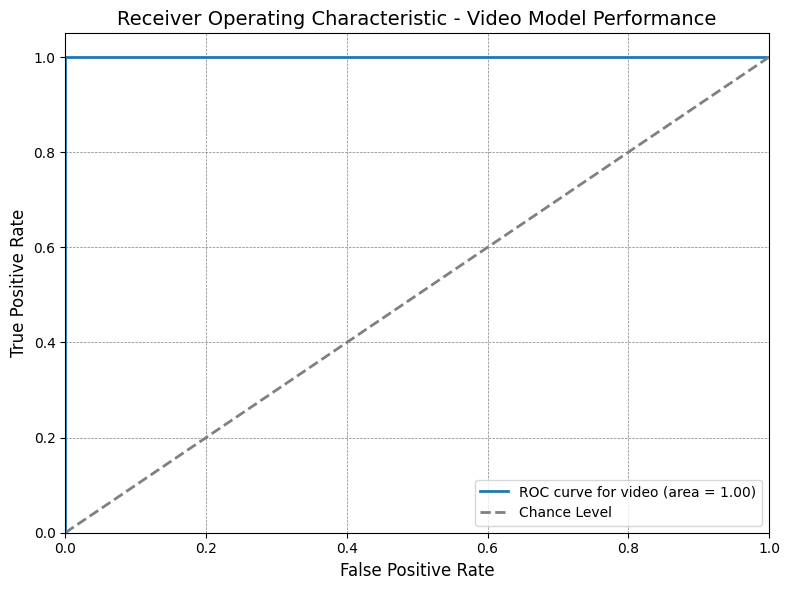

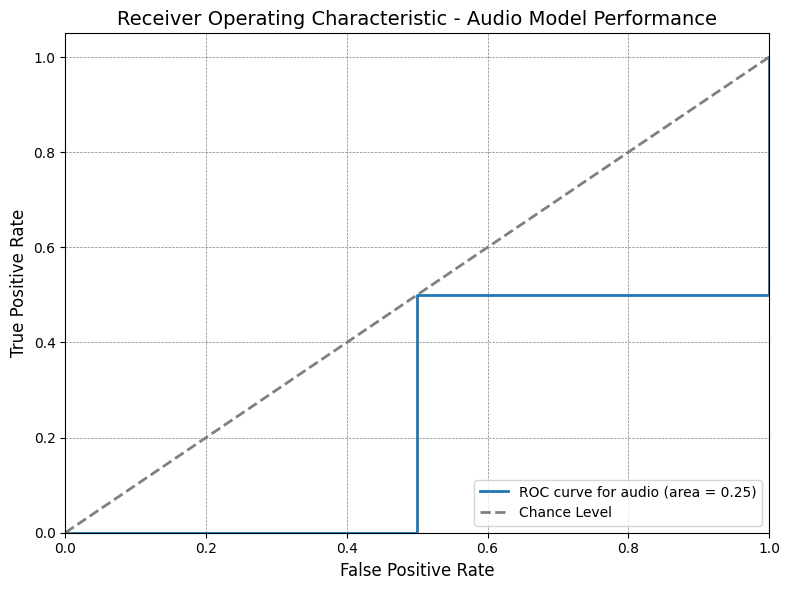

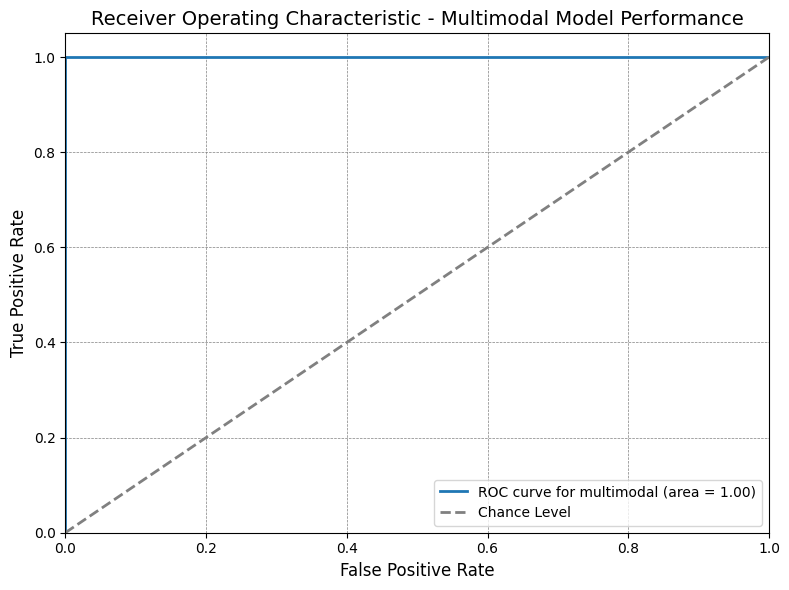

Video Model - Accuracy: 0.7500, F2-Score: 0.9091
Audio Model - Accuracy: 0.5000, F2-Score: 0.8333
Multimodal - Accuracy: 0.5000, F2-Score: 0.8333, TPR (Recall): 1.0000, FPR: 1.0000


In [ ]:
#@title Main with train test split

# Everything that is randomly selected has been seeded for fair comparisons

# However the haar cascade detector can be unpredictable - therefore the benchmarks timings are going have some uncertainty.

import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import joblib
import cv2
from skimage.feature import local_binary_pattern
import librosa
from sklearn.preprocessing import normalize
from skimage.feature import local_binary_pattern
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, confusion_matrix

def main():
    # Set your input directory containing fake and real videos
    input_dir = "benchmark_dataset" # full benchmark dataset
    # Load data
    X_video, X_audio, y = load_data(input_dir)

    # Split data into training and testing sets
    X_video_train, X_video_test, X_audio_train, X_audio_test, y_train, y_test = train_test_split(X_video, X_audio, y, test_size=0.2, random_state=42)

    print("Class distribution in training set:", np.bincount(y_train))
    print("Class distribution in test set:", np.bincount(y_test))

    # Train models
    svm_video, svm_audio, scaler_video, scaler_audio, _, _, _ = train_model(X_video_train, X_audio_train, y_train)

    # Calculate ROC curve for video on testing set
    X_video_test_scaled = scaler_video.transform(X_video_test)
    video_probs = svm_video.predict_proba(X_video_test_scaled)[:, 1]
    fpr_video, tpr_video, _ = roc_curve(y_test, video_probs)
    roc_auc_video = auc(fpr_video, tpr_video)

    # Calculate ROC curve for audio on testing set
    X_audio_test_scaled = scaler_audio.transform(X_audio_test)
    audio_probs = svm_audio.predict_proba(X_audio_test_scaled)[:, 1]
    fpr_audio, tpr_audio, _ = roc_curve(y_test, audio_probs)
    roc_auc_audio = auc(fpr_audio, tpr_audio)

    # Perform late fusion: average the probabilities from both models
    combined_probs = (video_probs + audio_probs) / 2

    # Calculate ROC curve and AUC for the combined predictions
    fpr_combined, tpr_combined, _ = roc_curve(y_test, combined_probs)
    roc_auc_combined = auc(fpr_combined, tpr_combined)

    print(f"ROC AUC for late fusion: {roc_auc_combined}")


    # Plot ROC curve for video
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_video, tpr_video, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for video (area = {:.2f})'.format(roc_auc_video))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Video Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Plot ROC curve for audio
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_audio, tpr_audio, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for audio (area = {:.2f})'.format(roc_auc_audio))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Audio Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Plot ROC curve for multimodal
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_combined, tpr_combined, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for multimodal (area = {:.2f})'.format(roc_auc_combined))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Multimodal Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Show all plots
    plt.show()

    # Convert combined probabilities to class predictions for evaluation
    # Thresholding probabilities at 0.5 to decide between classes (0 and 1)
    # multimodal_predictions = (combined_probs > 0.5).astype(int)
    # Convert video and audio probabilities to class predictions for evaluation
    video_predictions = (video_probs > 0.5).astype(int)
    audio_predictions = (audio_probs > 0.5).astype(int)

    # Correct way to generate multimodal predictions
    multimodal_predictions = ((video_probs > 0.5) | (audio_probs > 0.5)).astype(int)

    # Evaluate and print metrics for video model
    video_accuracy = accuracy_score(y_test, video_predictions)
    video_f2_score = fbeta_score(y_test, video_predictions, beta=2)
    print(f"Video Model - Accuracy: {video_accuracy:.4f}, F2-Score: {video_f2_score:.4f}")

    # Evaluate and print metrics for audio model
    audio_accuracy = accuracy_score(y_test, audio_predictions)
    audio_f2_score = fbeta_score(y_test, audio_predictions, beta=2)
    print(f"Audio Model - Accuracy: {audio_accuracy:.4f}, F2-Score: {audio_f2_score:.4f}")

    # Then calculate and print the evaluation metrics for the multimodal predictions
    accuracy = accuracy_score(y_test, multimodal_predictions)
    f2_score = fbeta_score(y_test, multimodal_predictions, beta=2)
    recall = recall_score(y_test, multimodal_predictions)  # Same as TPR
    tn, fp, fn, tp = confusion_matrix(y_test, multimodal_predictions).ravel()
    fpr = fp / (fp + tn)

    # Print the metrics for multimodal predictions
    print(f"Multimodal - Accuracy: {accuracy:.4f}, F2-Score: {f2_score:.4f}, TPR (Recall): {recall:.4f}, FPR: {fpr:.4f}")

if __name__ == "__main__":
    main()




In [ ]:
!rm -r benchmark_dataset/RealVideo-FakeAudio/.ipynb_checkpoints

In [ ]:
#@title Evaluate pretrained model on new dataset
#
# Main with train test split

import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import joblib
import cv2
from skimage.feature import local_binary_pattern
import librosa
from sklearn.preprocessing import normalize
from skimage.feature import local_binary_pattern
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio

def evaluate_pretrained_model():
    # Set your input directory containing fake and real videos
    input_dir = "evaluation_set"

    # Load data
    X_video, X_audio, y = load_data(input_dir)
    print('Loaded data.')

    # Split data into training and testing sets
    X_video_train, X_video_test, X_audio_train, X_audio_test, y_train, y_test = train_test_split(X_video, X_audio, y, test_size=0.2, random_state=42)
    print('Test Train split done.')

    # Train models
    # svm_video, svm_audio, scaler_video, scaler_audio, _, _, _ = train_model(X_video_train, X_audio_train, y_train)
    svm_video = joblib.load("svm_model_video.pkl")
    scaler_video = joblib.load("scaler_video.pkl")
    svm_audio = joblib.load("svm_model_audio.pkl")
    scaler_audio = joblib.load("scaler_audio.pkl")


    # Calculate ROC curve for video on testing set
    X_video_test_scaled = scaler_video.transform(X_video_test)
    video_probs = svm_video.predict_proba(X_video_test_scaled)[:, 1]
    fpr_video, tpr_video, _ = roc_curve(y_test, video_probs)
    roc_auc_video = auc(fpr_video, tpr_video)

    # Calculate ROC curve for audio on testing set
    X_audio_test_scaled = scaler_audio.transform(X_audio_test)
    audio_probs = svm_audio.predict_proba(X_audio_test_scaled)[:, 1]
    fpr_audio, tpr_audio, _ = roc_curve(y_test, audio_probs)
    roc_auc_audio = auc(fpr_audio, tpr_audio)

    # Combine probabilities for multimodal on testing set
    X_combined_scaled = np.hstack((X_video_test_scaled, X_audio_test_scaled))
    svm_combined = SVC(kernel='linear', probability=True)
    svm_combined.fit(X_combined_scaled, y_test)
    multimodal_probs = svm_combined.predict_proba(X_combined_scaled)[:, 1]
    fpr_multi, tpr_multi, _ = roc_curve(y_test, multimodal_probs)
    roc_auc_multi = auc(fpr_multi, tpr_multi)

    # Plot ROC curve for video
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_video, tpr_video, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for video (area = {:.2f})'.format(roc_auc_video))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Video Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Plot ROC curve for audio
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_audio, tpr_audio, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for audio (area = {:.2f})'.format(roc_auc_audio))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Audio Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Plot ROC curve for multimodal
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_multi, tpr_multi, color='#1f77b4', lw=2, linestyle='-', label='ROC curve for multimodal (area = {:.2f})'.format(roc_auc_multi))
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic - Multimodal Model Performance', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.tight_layout()

    # Show all plots
    plt.show()

    # Example of using the multimodal model for evaluation on a specific video
    video_path = "00052.mp4"
    audio_path = "00052.mp4"

    # Extract features from provided video and audio paths
    video_features = extract_video_features(video_path)
    audio_features = extract_audio_features(audio_path)

    if video_features is None or audio_features is None:
        print("Error: Unable to extract features from the provided video or audio.")
        return

    # Scale features using training set scalers
    video_features_scaled = scaler_video.transform(video_features.reshape(1, -1))
    audio_features_scaled = scaler_audio.transform(audio_features.reshape(1, -1))

    # Predict using multimodal model
    multimodal_features_scaled = np.hstack((video_features_scaled, audio_features_scaled))
    multimodal_prediction = svm_combined.predict(multimodal_features_scaled)[0]

    print("Multimodal prediction: ", "deepfake" if multimodal_prediction == 1 else "real")

if __name__ == "__main__":
    evaluate_pretrained_model()